In [1]:
# Mengakses API covid19.go.id

# Rekapitulasi data COVID-19 Indonesia tersedia dalam API publik yang beralamat di 
# https://data.covid19.go.id/public/api/update.json.

# Salah satu cara untuk mengakses API adalah dengan menggunakan fungsi get() dari library requests.

# Sekarang aktifkanlah library requests dan jalankan fungsi get() pada alamat API yang telah disebutkan! 
# Simpan hasil fungsi tersebut dalam obyek bernama resp.

import requests
resp = requests.get('https://data.covid19.go.id/public/api/update.json')

# Saat Anda menjalankan fungsi get(), pada dasarnya hal yang terjadi adalah Anda membuat sebuah permintaan kepada server penyedia API. 
# Permintaan Anda tersebut selanjutnya diproses dan dijawab oleh server sebagai sebuah respon. 
# Objek resp yang telah Anda buat memiliki informasi respon oleh server.

# Ada tiga informasi utama dalam sebuah respon API, yaitu status, headers, dan body. 
# Status memiliki informasi apakah permintaan Anda berhasil atau tidak dan dinyatakan dalam status code, 
# headers umumnya mengandung informasi metadata, sedangkan body berisikan konten atas permintaan yang telah dibuat.

In [2]:
# Status Code

# Ada beberapa jenis status code yang umumnya dijumpai, antara lain:

# 200 Artinya permintaan sukses dipenuhi.
# 404 Artinya berkas yang diminta tidak dapat ditemukan.
# 500 Artinya akses permintaan ditolak.
# 501 Artinya terjadi kesalahan pada server.

# Informasi lengkap mengenai jenis-jenis status code dapat Anda pelajari di https://restfulapi.net/http-status-codes/

# Anda dapat mencetak resp secara langsung yang telah memberikan output status atas permintaan Anda melalui API. 
# Sekarang coba lihatlah status atas permintaan yang telah Anda buat! Apakah permintaan Anda berhasil?

print(resp)

<Response [200]>


In [3]:
# Headers API

# Selamat status permintaan Anda melalui API sukses dipenuhi! 
#Sekarang cobalah Anda jalankan attribut headers pada resp untuk mengetahui metadata apa saja yang tersimpan. 
# Tampilkan dengan menggunakan fungsi print. 

# Apakah isi dari elemen content-type?
# Kapan terakhir kali informasi diperbaharui?

print(resp.headers)

{'Server': 'nginx', 'Date': 'Wed, 03 Mar 2021 10:59:05 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'Last-Modified': 'Wed, 03 Mar 2021 10:55:01 GMT', 'ETag': 'W/"603f6b05-2272b"', 'X-Content-Type-Options': 'nosniff, nosniff', 'X-XSS-Protection': '1; mode=block, 1; mode=block', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Content-Encoding': 'gzip'}


In [4]:
# Mengekstrak Isi Respon

# Respon API dengan status code 200 menyatakan bahwa permintaan Anda berhasil dipenuhi dan konten yang diminta tersedia untuk diekstrak. 
# Selain itu Anda juga telah mengetahui lewat attribut headers bahwa konten yang diminta tersedia dalam bentuk application/json, yaitu berkas JSON.

# Selanjutnya Anda dapat mengekstrak konten tersebut dengan menggunakan method json(). 
# Method json() merupakan builtin JSON decoder untuk mengekstrak content bertipe JSON. 
# Anda juga dapat menggunakan attribut content tetapi ini berupa binary content yang perlu Anda proses kembali nantinya. 
# Jalankan method json() pada obyek resp dan simpanlah hasilnya sebagai cov_id_raw!

# cov_id_raw ini bertipe data dict.

cov_id_raw = resp.json()

In [5]:
# Mengekstrak isi Respon - 2

# Dengan menggunakan fungsi len() dan method keys() cobalah amati ada berapa komponen serta apa saja nama komponen dalam obyek cov_id_raw tersebut! 
# Kemudian ekstraklah key ke-2 dan simpan dengan nama cov_id_update.

print('Length of cov_id_raw : %d.' %len(cov_id_raw))
print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Length of cov_id_raw : 2.
Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [6]:
# Analisa Data

# Sekarang Anda diminta untuk fokus pada obyek cov_id_update untuk menjawab pertanyaan-pertanyaan berikut:

# Kapan tanggal pembaharuan data penambahan kasus?
# Berapa jumlah penambahan kasus sembuh?
# Berapa jumlah penambahan kasus meninggal?
# Berapa jumlah total kasus positif hingga saat ini?
# Berapa jumlah total kasus meninggal hingga saat ini?

print('Tanggal pembaharuan data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh   :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal   :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini   :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus meninggal hingga saat ini  :', cov_id_update['total']['jumlah_meninggal'])

Tanggal pembaharuan data penambahan kasus   : 2021-03-03
Jumlah penambahan kasus sembuh   : 9053
Jumlah penambahan kasus meninggal   : 203
Jumlah total kasus positif hingga saat ini   : 1353834
Jumlah total kasus meninggal hingga saat ini  : 36721


In [7]:
# Apa Kabar Jawa Barat?

# Anda telah berhasil menjawab pertanyaan mengenai kondisi COVID-19 di Indonesia dengan menggunakan data yang langsung diambil menggunakan API. 
# Namun bagaimana jika Anda ingin berfokus dengan data COVID-19 di provinsi tempat menetap saat ini?

# covid19.go.id menyediakan data kasus COVID-19 tingkat provinsi di alamat API yang berbeda. 
# Sebagai data mengenai COVID-19 Jawa Barat, tempat tinggal saya sekarang, tersedia di 
# https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json.

import requests
resp_jabar = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json')
cov_jabar_raw = resp_jabar.json()

In [8]:
# Memahami Kasus COVID-19 di Jawa Barat

# Sekarang jalankanlah method keys() pada cov_jabar_raw tersebut untuk mengetahui nama-nama elemen utama yang tersedia dan jawablah pertanyaan berikut:

# Berapa jumlah total kasus COVID-19 di Jawa Barat?
# Berapa persentase kematian akibat COVID-19 di Jawa Barat?
# Berapa persentase tingkat kesembuhan dari COVID-19 di Jawa Barat?

print('Nama-nama elemen utama:\n', cov_jabar_raw.keys())
print('\nJumlah total kasus COVID-19 di Jawa Barat                 : %d' %cov_jabar_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Jawa Barat         : %f.2%%' %cov_jabar_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : %f.2%%' %cov_jabar_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Jawa Barat                 : 211212
Persentase kematian akibat COVID-19 di Jawa Barat         : 1.117834.2%
Persentase tingkat kesembuhan dari COVID-19 di Jawa Barat : 81.458913.2%


In [9]:
# Memperoleh Informasi yang Lebih Lengkap

# Informasi umum mengenai COVID-19 di Jawa Barat telah Anda dapatkan. 
# Namun informasi akan lebih lengkap jika Anda memiliki data perkembangan COVID-19 dari waktu ke waktu, apakah Anda setuju?

# Kabar baiknya adalah informasi tersebut juga disediakan oleh covid19.go.id melalui permintaan API yang telah Anda buat sebelumnya. 
# Data historis perkembangan COVID-19 tersebut tersimpan dengan nama list_perkembangan. 
# Silakan Anda ekstrak data tersebut dari cov_jabar_raw dan untuk lebih memudahkan dalam menginspeksi data ubahlah data bertipe dict ke pandas dataframe. 
# Kemudian simpanlah hasilnya sebagai obyek bernama cov_jabar! Amati struktur cov_jabar menggunakan method info() dan head().

import numpy as np
import pandas as pd
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])
print('Info cov_jabar:\n', cov_jabar.info())
print('\nLima data teratas cov_jabar:\n', cov_jabar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       364 non-null    int64
 1   KASUS                         364 non-null    int64
 2   MENINGGAL                     364 non-null    int64
 3   SEMBUH                        364 non-null    int64
 4   DIRAWAT_OR_ISOLASI            364 non-null    int64
 5   AKUMULASI_KASUS               364 non-null    int64
 6   AKUMULASI_SEMBUH              364 non-null    int64
 7   AKUMULASI_MENINGGAL           364 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  364 non-null    int64
dtypes: int64(9)
memory usage: 25.7 KB
Info cov_jabar:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583107200000      3          0       0                   3   
1  1583193600000      1          1       0   

In [10]:
# Menjinakkan Data

# Setelah mengekstrak dan mengamati cov_jabar, Anda menemukan beberapa kejanggalan pada data tersebut. 
# Diantaranya adalah kejanggalan data pada kolom tanggal dan format penulisan kolom yang tidak konsisten. 
# Sekarang Anda akan mencoba melakukan beberapa tahapan untuk menjinakan data tersebut sehingga dapat diolah dan dianalisis dengan lebih mudah.

# Ada beberapa tahapan yang akan Anda lakukan untuk menjinakan data cov_jabar, yaitu:

# Menghapus kolom DIRAWAT_OR_ISOLASI dan semua kolom yang berisi nilai kumulatif
# Merubah format penulisan semua kolom menjadi huruf kecil
# Mengganti nama kolom kasus menjadi kasus_baru
# Memperbaiki tipe data pada kolom tanggal menggunakan pd.to_datetime

# Lengkapilah baris kode berikut untuk melakukan menjinakan data sesuai dengan tahapan yang telah Anda rencanakan! 
# Anda akan menggunakan teknik chaining pada dataframe. 
# Simpan hasil pengolahan Anda dengan nama cov_jabar_tidy.

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jabar_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-02           3          0       0
1 2020-03-03           1          1       0
2 2020-03-04           1          0       0
3 2020-03-05           1          0       0
4 2020-03-06           1          0       0


<Figure size 432x288 with 0 Axes>

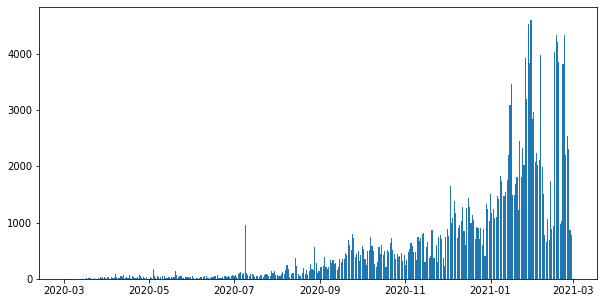

In [11]:
# Menunjukkan Melalui Gambar

# Akhirnya Anda berhasil menjinakan data cov_jabar menjadi cov_jabar_tidy sehingga lebih mudah untuk diolah, selamat! 
# Memiliki data yang rapi memang menyenangkan, apakah Anda setuju dengan hal tersebut?

# Setelah memiliki data yang jinak, sekarang saatnya Anda mengekspresikan data tersebut dalam bentuk lain yang harapannya lebih mudah dicerna: grafik. 
# Anda akan memulai merancang visualisasi yang memiliki estetika dengan menggunakan library matplotlib. 
# Imporlah library tersebut sebagai aliasnya!

import matplotlib.pyplot as plt

# Berikut merupakan template kode untuk membuat visualisasi menggunakan matplotlib:
# fig, ax = plt.subplots(figsize=(..., ...))
# ax.jenis_plot(..., ..., data=...)

# Berdasarkan templat tersebut, komponen utama untuk membuat visualisasi antara lain adalah tabel data, kolom data, serta bentuk geometri untuk mempresentasikan data. 
# Sebagai contoh untuk membuat scatter-plot yang diperlukan adalah bentuk geometri titik (.scatter()), 
# line-chart memerlukan geometri garis (.plot()), sedangkan bar-chart memerlukan bentuk geometri batang atau kolom (.bar()).

# Lengkapi baris kode berikut untuk membuat bar-chart jumlah kasus baru harian COVID-19 di Jawa Barat menggunakan data cov_jabar_tidy! 
# Pergunakan kolom tanggal sebagai sumbu-x.

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jabar_tidy, x='tanggal', height='kasus_baru')
plt.show()